# Video Game Sales Data Analysis

Video Game is one of the most popular source of entertainment. The history of video games goes as far back as the early 1950s. 
Accouding to [venturebeat] (venturebeat.com) , the video game industries have crossed $120.1 billion in 2019.



This is the course provided by [ Jovian] (jovian.ml). The course can be found at [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
In this course I learned to use Numpy & Pandas to parse, clean & analyze data and use Matplotlib & Seaborn to create visualizations

## Downloading the Dataset

For this project I have taken dataset from kaggle. The data sets are open source can be found at the following link: https://www.kaggle.com/gregorut/videogamesales

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bibekbc
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 48.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [9]:
# give a name to this project
project_name = "videoGameSales-analysis"

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "bibekbc/videoGameSales-analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bibekbc/videogamesales-analysis


'https://jovian.ml/bibekbc/videogamesales-analysis'

## Data Preparation and Cleaning

The read_csv method for pandas is used to read csv files. 

The Libraries I used in Project are:
* Matplotlib 
* Seaborn 
* Numpy 
* Pandas 
* Jovian 

Here various modes of displaying dataset which is in CSV format. First step is to load the data using pandas read_csv function. the data is stored in mutidimensional table called as dataframe.




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Load the dataset into a data frame using Pandas

In [14]:
vg_data_pd = pd.read_csv(data_dir + "/vgsales.csv")

In [15]:
vg_data_pd.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


**Columns are explained as below:**

* Ranking -- Game ranking based on the total sales (in millions)
* Name -- Name of the Game
* Platform -- Game Platforms like (PS4, PC, GB etc)
* Year -- Year of game release
* Genre -- Simply the game genre (sports, racing ... )
* publisher -- name of the publisher
* NA_Sales -- Sales in north america (in millions)
* EU_sales -- Sales in Europe (in millions)
* JP_sales -- Sales in Japan (in millions)
* Other_Sales -- Sales in the rest of the world (in millions)
* Global_Sales -- Total sales world wide (in millions)

#### Explore the number of rows & columns, ranges of values etc.

In [16]:
vg_data_pd.shape

(16598, 11)

We have 16598 rows and 11 columns

#### Handle missing, incorrect and invalid data

In [17]:
vg_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
vg_data_pd.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

The column "Year" and "Publisher" has data missing.

## Exploratory Analysis and Visualization

Visually representing the content of a datset is one of the most important tasks in the field of data science. 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

#### Compute the mean, sum, range and other interesting statistics for numeric columns

In [19]:
vg_data_pd.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The 'Global_Sales' cloumn has range of(0.010000, 82.740001). Similarly we can view the mean, standard deviation etc

#### Explore distributions of numeric columns using histograms etc.

#### Lineplot

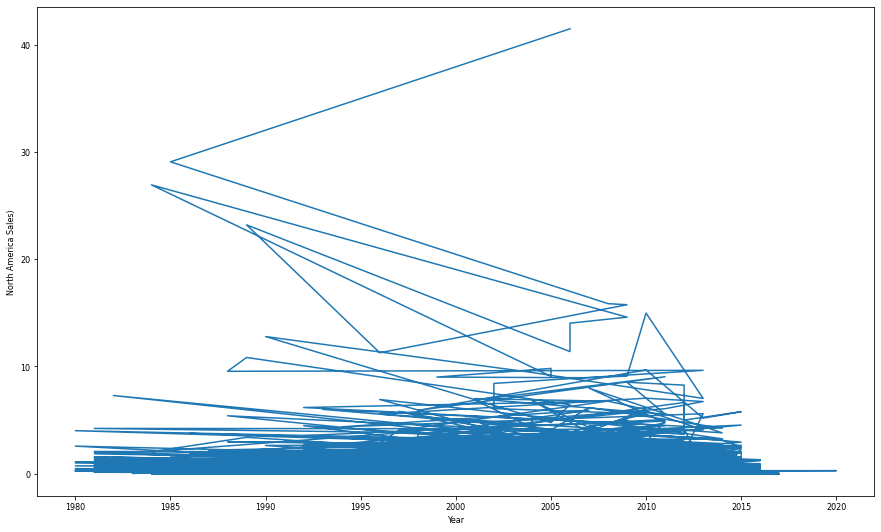

In [20]:
plt.plot(vg_data_pd.Year, vg_data_pd.NA_Sales)
plt.xlabel('Year')
plt.ylabel('North America Sales)');

In North America Sales, maximum sales was reached in 2007. It is outlier in the dataset. The most sales amount is under 5

#### Histogram

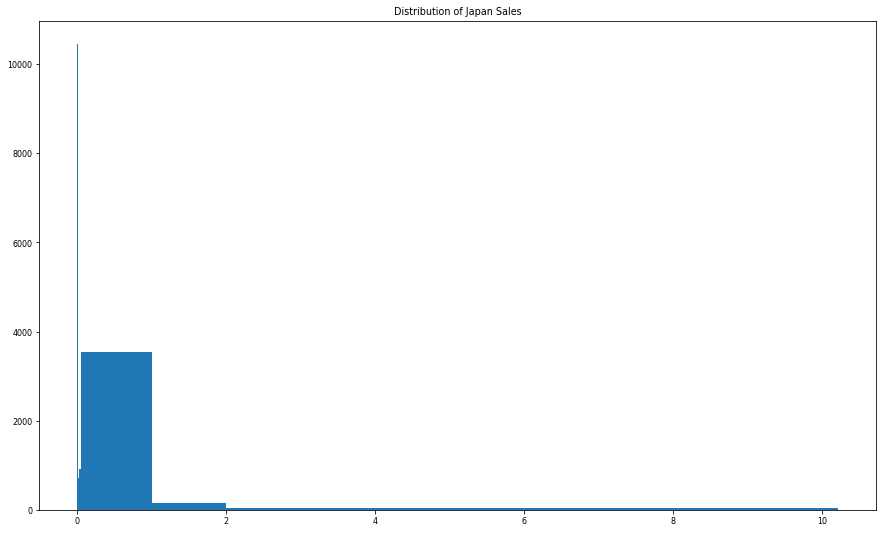

In [21]:
plt.title("Distribution of Japan Sales")
# plt.xticks(rotation='vertical')
plt.hist(vg_data_pd.JP_Sales, bins=[0.00, 0.01, 0.02, 0.03, 0.05, 1, 2, 3, 10.22]);

This histogram shows most of the Japan Sales is concentrated 0 and 1.

#### Explore relationship between columns using scatter plots, bar charts etc.

In [22]:
vg_data_pd.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

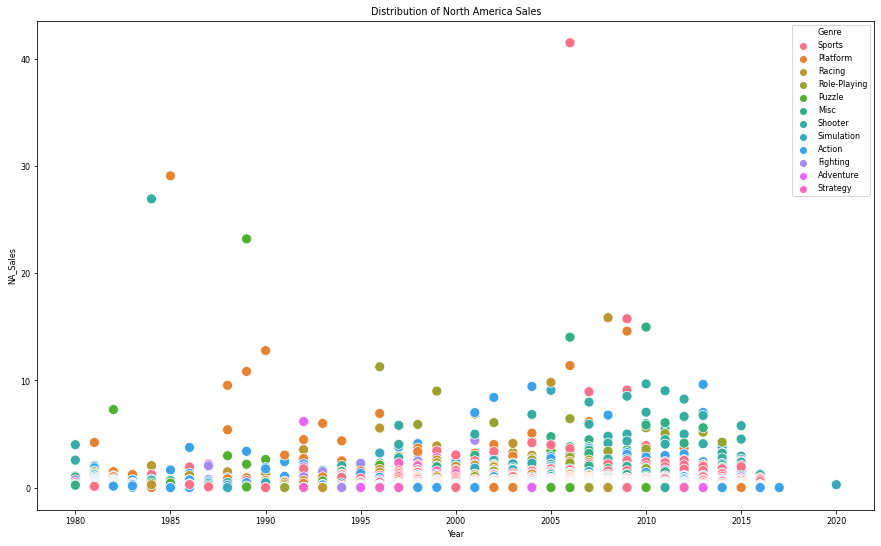

In [23]:
plt.title("Distribution of North America Sales")
plt.xlabel('Year')
plt.ylabel('North America Sales)')
# plt.xticks(rotation='vertical')
sns.scatterplot(vg_data_pd.Year, vg_data_pd.NA_Sales, hue=vg_data_pd.Genre, s=100);

The Genre 'Sports' has highest sale in 2007.

#### Seaborn pairplot
Plot pairwise relationships in a dataset.

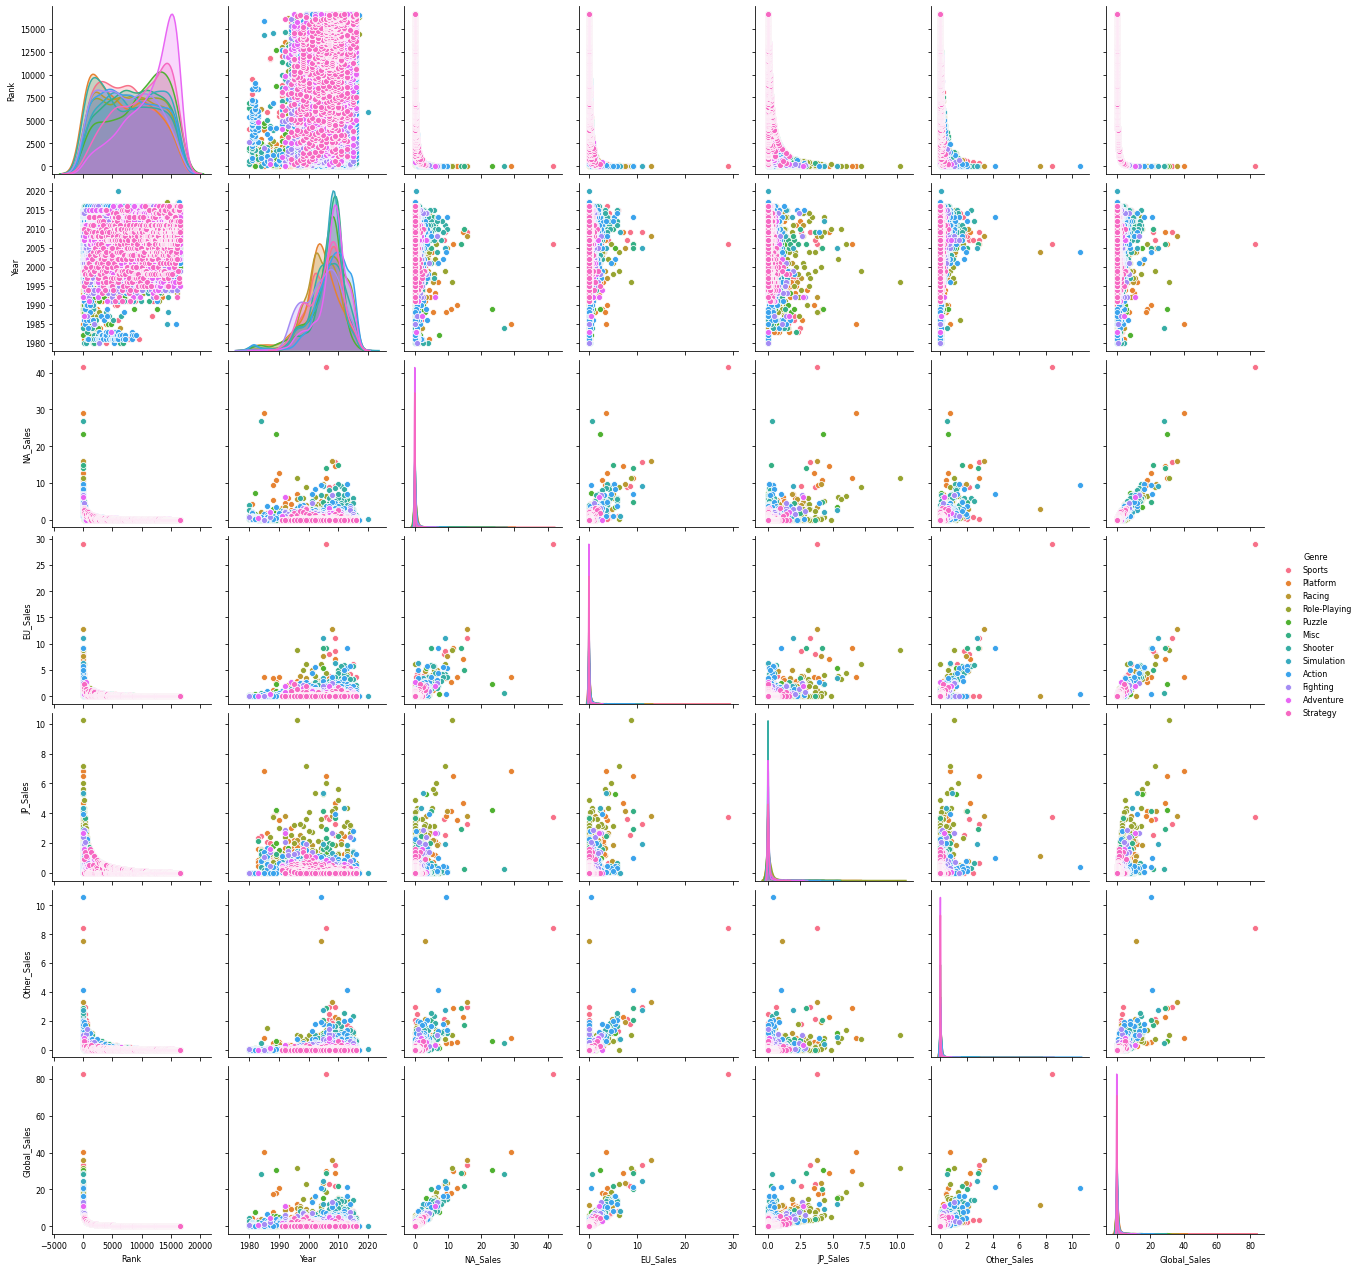

In [24]:
sns.pairplot(vg_data_pd, hue='Genre');

This pairplot shows there is strong corelation between Global_sales and NA_Sales

##### Comparison of total sales with terrirory

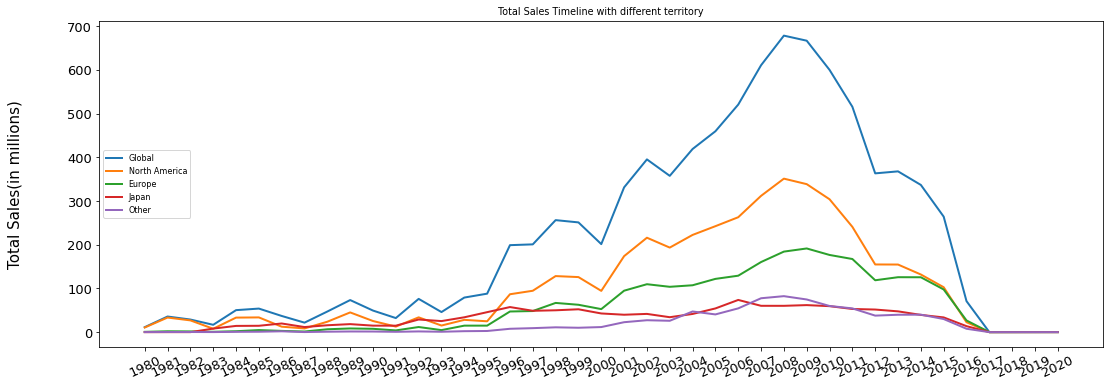

In [25]:
df_year = vg_data_pd.groupby('Year').sum().sort_values(by=['Year'],ascending = False)

fig,cc = plt.subplots(figsize=(18,6))
cc.plot(df_year.index,df_year['Global_Sales'],label ='Global',linewidth=2)
cc.plot(df_year.index,df_year['NA_Sales'],label ='North America',linewidth=2)
cc.plot(df_year.index,df_year['EU_Sales'],label ='Europe',linewidth=2)
cc.plot(df_year.index,df_year['JP_Sales'],label ='Japan',linewidth=2)
cc.plot(df_year.index,df_year['Other_Sales'],label ='Other',linewidth=2)

cc.legend(loc="center left")
plt.title("Total Sales Timeline with different territory")
cc.set_ylabel('Total Sales(in millions)', fontsize=15,labelpad=45)
cc.set_xticks(np.arange(1980,2021,1))

cc.tick_params(axis='both', which='major', labelsize=13)
cc.grid(False)

for item in cc.get_xticklabels():
    item.set_rotation(25)

**Insights are explained as below:**

* Data is missing 2018, 2019 and 2020 for Global, North America, Europe and Japan
* Highest sale occrued in 2007 for Global_Sales and NA_Sales
* The trend shows that there is decline in video game sales from 2007


#### My Questions in this project are:
* How many games have been sold between 1980 and 2020 in Millions ?
* In which year total sales was maximum in Japan between the range of year 1980 to 2020 and what is the amount?
* Which 'Genre' has highest sales in 'NA_Sales' category ?
* What is the market share of PS4 platform globally?


#### Q1 How many games have been sold between 1980 and 2020 in Millions ?

In [26]:
print('''Total amount in millions, ranges from 1980 to 2020.''')
year_count = [i for i in range(1980, 2020)]
count_in_range = vg_data_pd.loc[vg_data_pd['Year'].isin(year_count)]

ns = sum(count_in_range.NA_Sales) #Total sales in North America
print('\nTotal Sales in North America from 1980 to 2020  is',round(ns),'Millions')

es = sum(count_in_range.EU_Sales) #Total sales in Europe
print('Total Sales in Europe from 1980 to 2020  is',round(es),'Millions')

js = sum(count_in_range.JP_Sales) #Total sales in Japan
print('Total Sales in Japan from 1980 to 2020  is',round(js),'Millions')

oth = sum(count_in_range.Other_Sales) #Sales in Others
print('Total Sales in Others from 1980 to 2020  is',round(oth),'Millions')

gs = sum(count_in_range.Global_Sales) #Global Sales
print('\nTotal Sales from Globally from 1980 to 2020  is',round(gs),'Millions')

Total amount in millions, ranges from 1980 to 2020.

Total Sales in North America from 1980 to 2020  is 4333 Millions
Total Sales in Europe from 1980 to 2020  is 2409 Millions
Total Sales in Japan from 1980 to 2020  is 1284 Millions
Total Sales in Others from 1980 to 2020  is 789 Millions

Total Sales from Globally from 1980 to 2020  is 8820 Millions


#### Q2 In which year total sales was maximum in Japan between the range of year 1980 to 2020 and what is the amount?

In [27]:
jp_sale_total_year = vg_data_pd.groupby('Year')["JP_Sales"].sum()
# jp_sale_total_year

In [28]:
max_sale_year_jp = jp_sale_total_year.sort_values(ascending=False)
# max_sale_year_jp

In [29]:
print('Maximum Sales in Japan was in {}, and amount is {} Million' 
      .format(max_sale_year_jp.index[0], max_sale_year_jp.values[0]))

Maximum Sales in Japan was in 2006.0, and amount is 73.72999999999998 Million


#### Q3. Which 'Genre' has highest sales in 'NA_Sales' category ?

In [30]:
na_sale_total_by_genre = vg_data_pd.groupby('Genre')["NA_Sales"].sum()
# na_sale_total_by_genre

In [31]:
na_sale_total_by_genre = na_sale_total_by_genre.sort_values(ascending=False)
# na_sale_total_by_genre

In [32]:
print('Maximum Sales by Genre in North America is {}, and amount is {} Million' 
      .format(na_sale_total_by_genre.index[0], na_sale_total_by_genre.values[0]))

Maximum Sales by Genre in North America is Action, and amount is 877.8299999999916 Million


#### Q4 What is the market share of PS4 platform globally?

In [33]:
platform_global_sale = vg_data_pd.groupby('Platform')['Global_Sales'].sum()
# platform_global_sale

In [34]:
ps4_market_share = platform_global_sale.loc['PS4']/platform_global_sale.sum() *100
# ps4_market_share

In [35]:
print('Market share of PS4 platform globally is {}' 
      .format(ps4_market_share))

Market share of PS4 platform globally is 3.117559223536067


## Inferences and Conclusion

It was a very good exploratory data analysis experience for me. I learned a lot more about exploratory data analysis with the Pandas library, MatplitLib, Seaborn and numpy. My conclusion is: 
* The most used platform is 'PS2', most sold genre is 'Action', most sold area is 'North America'
* The peak of video game sales was in 2007 and there is constant fall afterward.

## References and Future Work

I found the course materiall very useful. I used the techniques taught in this course. I would like explore other techniques in future.

In [36]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
